In [261]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
fig_size = (20, 10)
annotation_font_size = 11
axes = []
def display(df, c_filter, title, normalize=False, mean=True, ignore='', dropna=True, fp=2):
    columns = [c for c in df.columns if c_filter in c]
    if ignore:
        columns = [c for c in columns if ignore not in c]
    gd = df[columns]
    gd.set_index(df['epoch'], inplace=True)

    if dropna:
        gd = gd.dropna()
    if mean:
        gd = gd.groupby('epoch').mean()
    if normalize:
        gd = (gd-gd.min())/(gd.max()-gd.min())

    ax = gd.plot(figsize=fig_size, title=title)
    for c in columns:
        last_epoch = gd.index[-1]
        last_value = gd.at[last_epoch, c]
        if last_value:
            ax.annotate(f'{last_value:.{fp}f}', xy=(last_epoch, last_value), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmin(), gd[c].min()
        ax.annotate(f'{y:.{fp}f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

        x, y = gd[c].idxmax(), gd[c].max()
        ax.annotate(f'{y:.{fp}f}', xy=(x, y), textcoords='data', fontsize=annotation_font_size)

    axes.append(ax)

def apply_shifted_episode_lengths(df, colname):
    breakpoint()
    s = df[colname].reset_index(drop=True)
    episode_ids = s
    change_points = (episode_ids != episode_ids.shift()).cumsum()
    lengths = episode_ids.groupby(change_points).transform('count')

    # Compute episode lengths per group
    groups = episode_ids.groupby(change_points)
    group_lens = groups.size().tolist()
    shifted_lens = group_lens[1:] + [group_lens[-1]]  # Shift left, last keeps its own length

    # Broadcast shifted lengths to each row
    expanded = pd.Series(dtype=int)
    for i, l in enumerate(shifted_lens):
        expanded = pd.concat([expanded, pd.Series([s[i]]*group_lens[i])], ignore_index=True)

    df[colname + "_shifted_len"] = expanded.astype(int)
    return df

In [355]:
model = '2025-04-16-1844'
!scp -r osnielteixeira2@200.20.15.153:~/experiments/{model}/ ~/Documents/UFF/mestrado/2o\ Sem/EO/gnn-co/experiments/
metrics_path = f'../experiments/{model}/version_0/metrics.csv'
metrics = pd.read_csv(metrics_path)

72.pt                                         100%   41KB   1.1MB/s   00:00    
225.pt                                        100%   37KB   1.2MB/s   00:00    
176.pt                                        100%   37KB   1.2MB/s   00:00    
279.pt                                        100%   38KB   1.4MB/s   00:00    
156.pt                                        100%   37KB   1.3MB/s   00:00    
297.pt                                        100%   38KB   1.4MB/s   00:00    
295.pt                                        100%   38KB   1.2MB/s   00:00    
68.pt                                         100%   41KB   1.6MB/s   00:00    
76.pt                                         100%   41KB   1.4MB/s   00:00    
112.pt                                        100%   37KB   1.3MB/s   00:00    
50.pt                                         100%   41KB   1.1MB/s   00:00    
163.pt                                        100%   37KB   1.1MB/s   00:00    
169.pt                                  

In [356]:
f'total epochs: {metrics.index.stop}'

'total epochs: 3758'

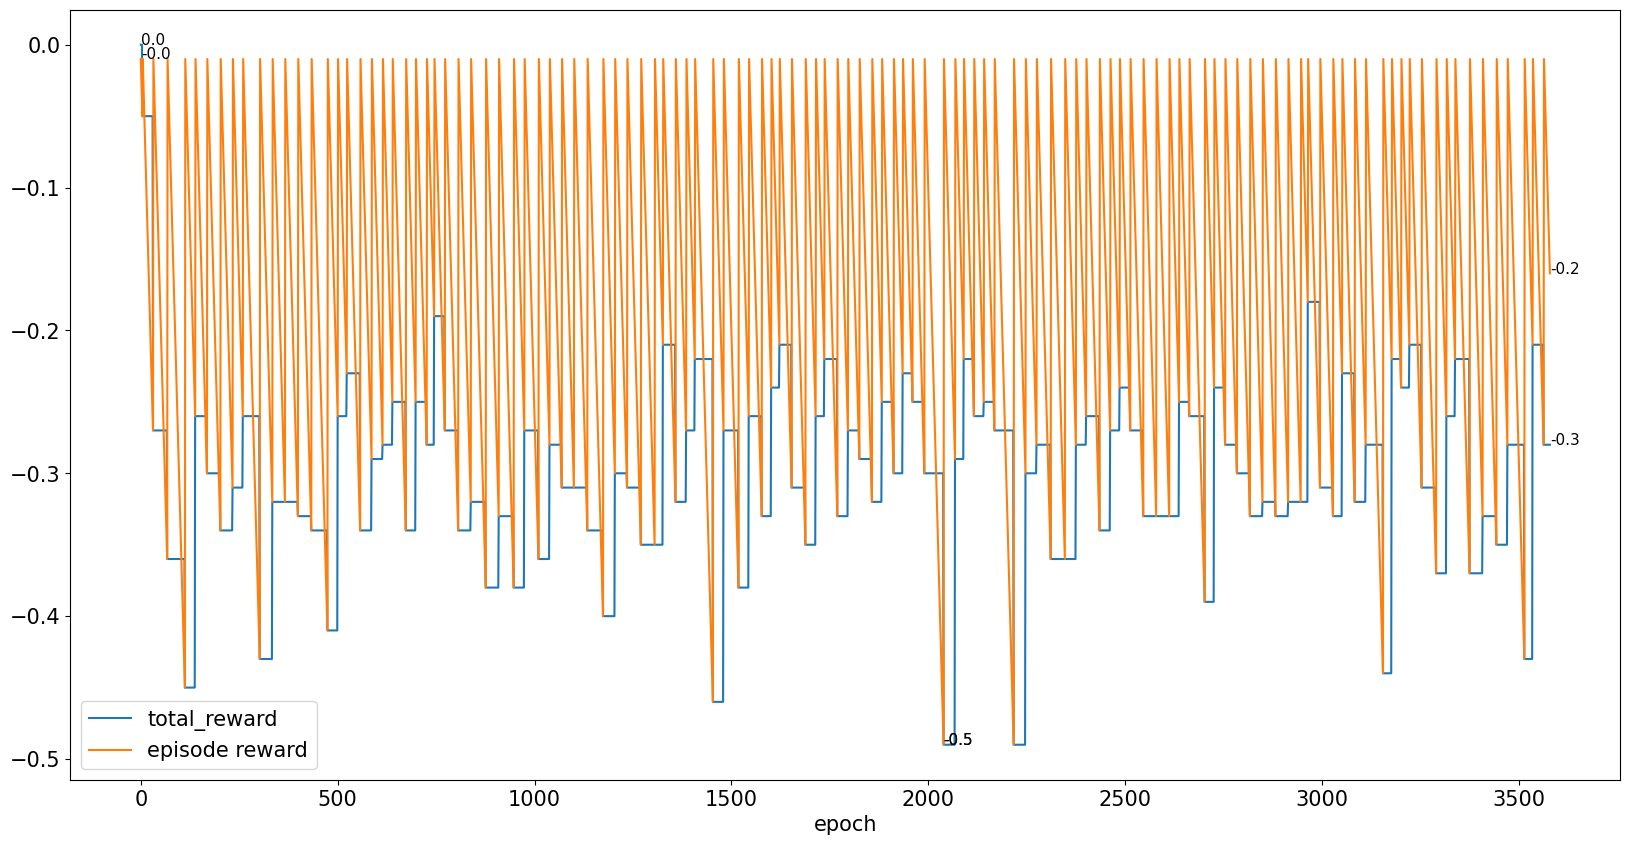

In [357]:
s_metrics = -metrics*100
s_metrics.epoch = metrics.epoch
# s_metrics['avg_return'] = s_metrics.avg_ep_reward
# s_metrics['avg_return ma'] = s_metrics.rolling(window=20)['avg_return'].mean()
metrics.drop('reward', axis=1, inplace=True)
# metrics = apply_shifted_episo"de_lengths(metrics, 'total_reward')

display(metrics, 'reward', '', ignore='val', fp=1)

In [358]:
 # display(metrics, 'aon', 'All or Nothing')

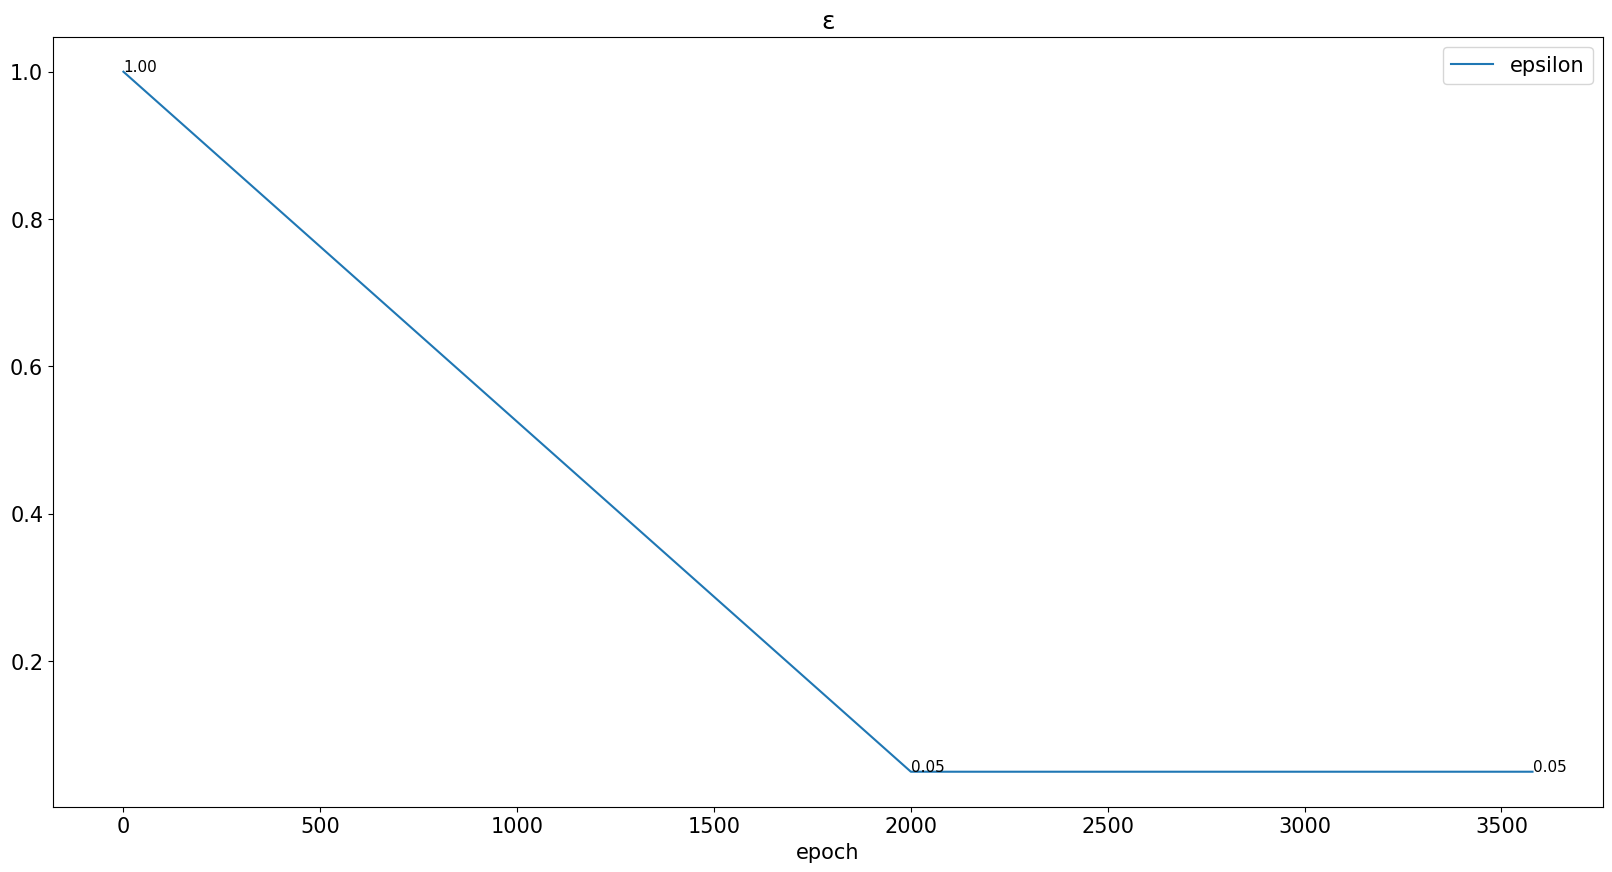

In [359]:
display(metrics, 'epsilon', 'ε')

In [360]:
# display(metrics, 'loss_actor', 'Loss Actor', fp=10)

In [361]:
# display(metrics, 'loss_critic', 'Loss Critic', fp=4)

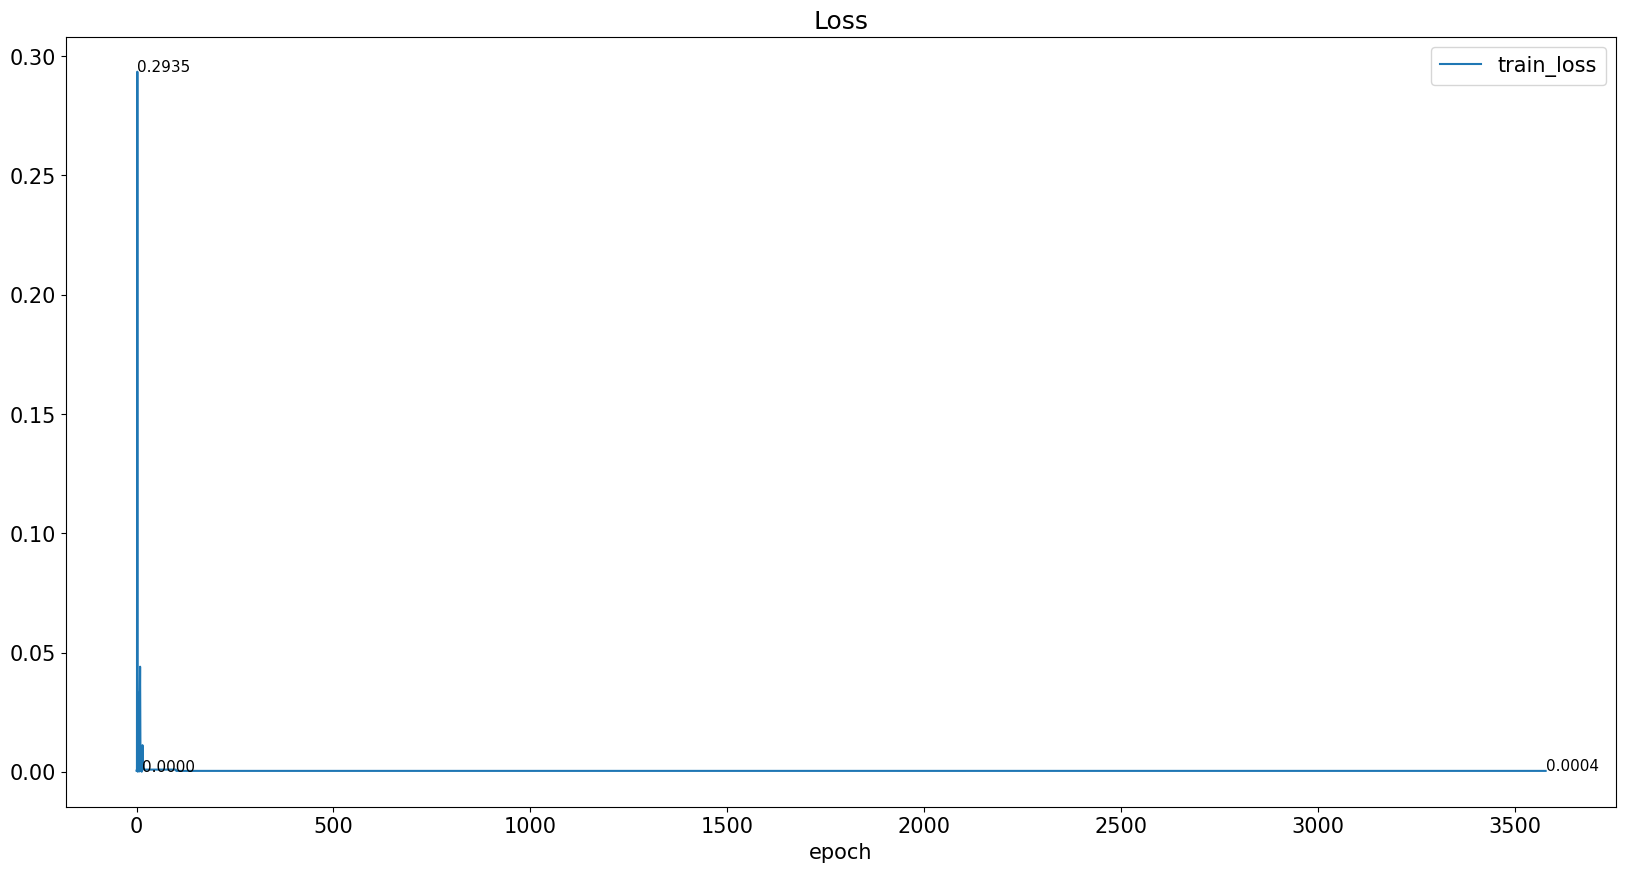

In [362]:
display(metrics, 'loss', 'Loss', fp=4)

In [363]:
#display(metrics, 'val', 'Validation', fp=2)

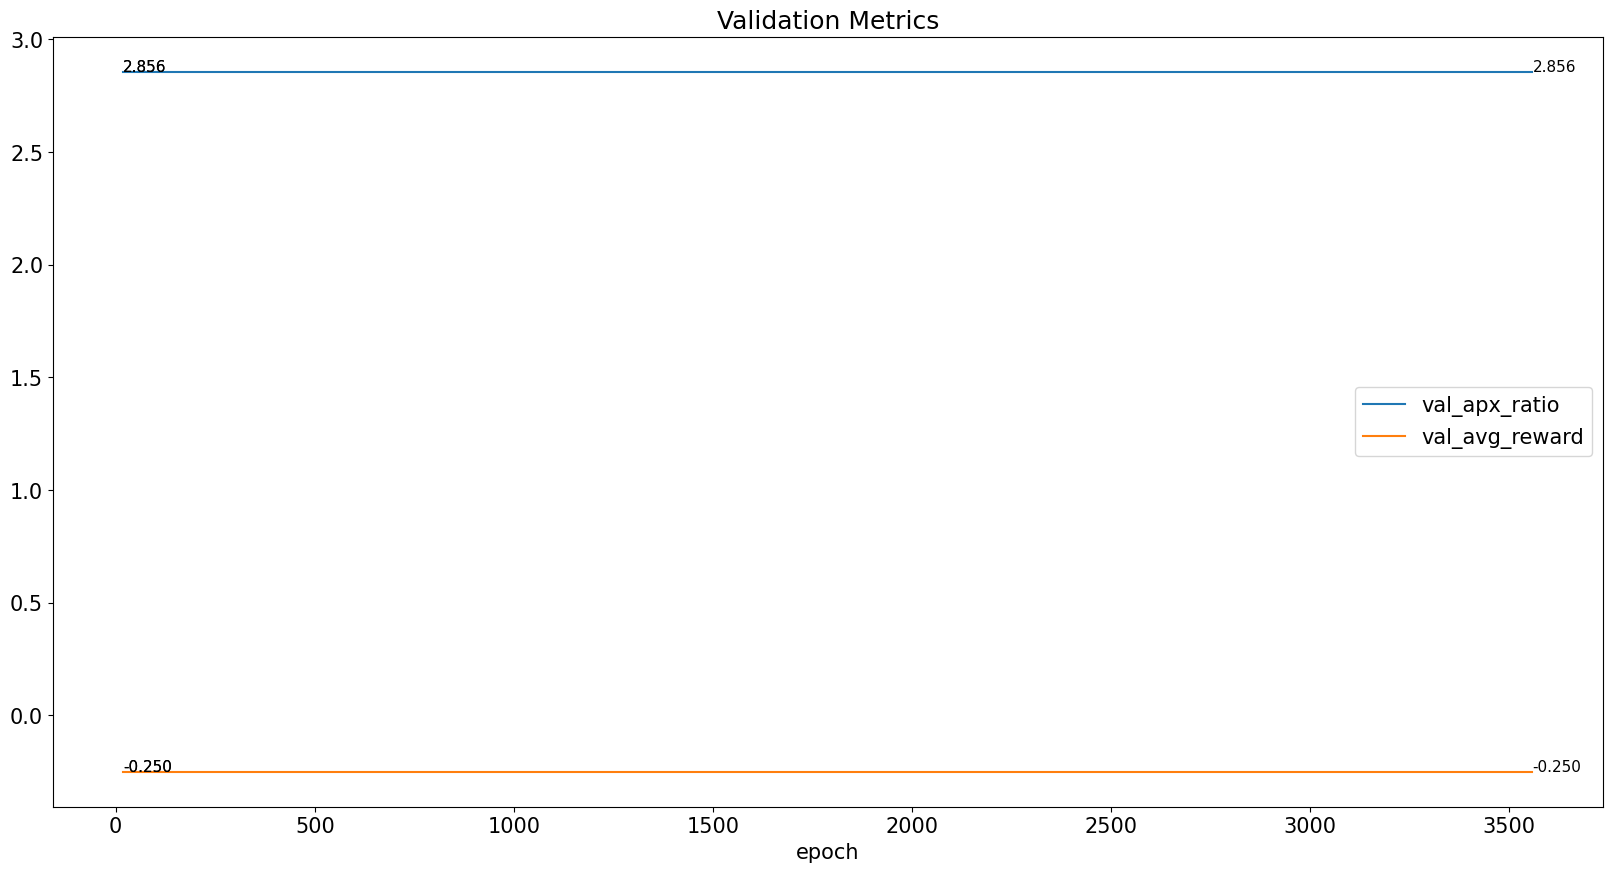

In [364]:
display(metrics, 'val', 'Validation Metrics', fp=3)

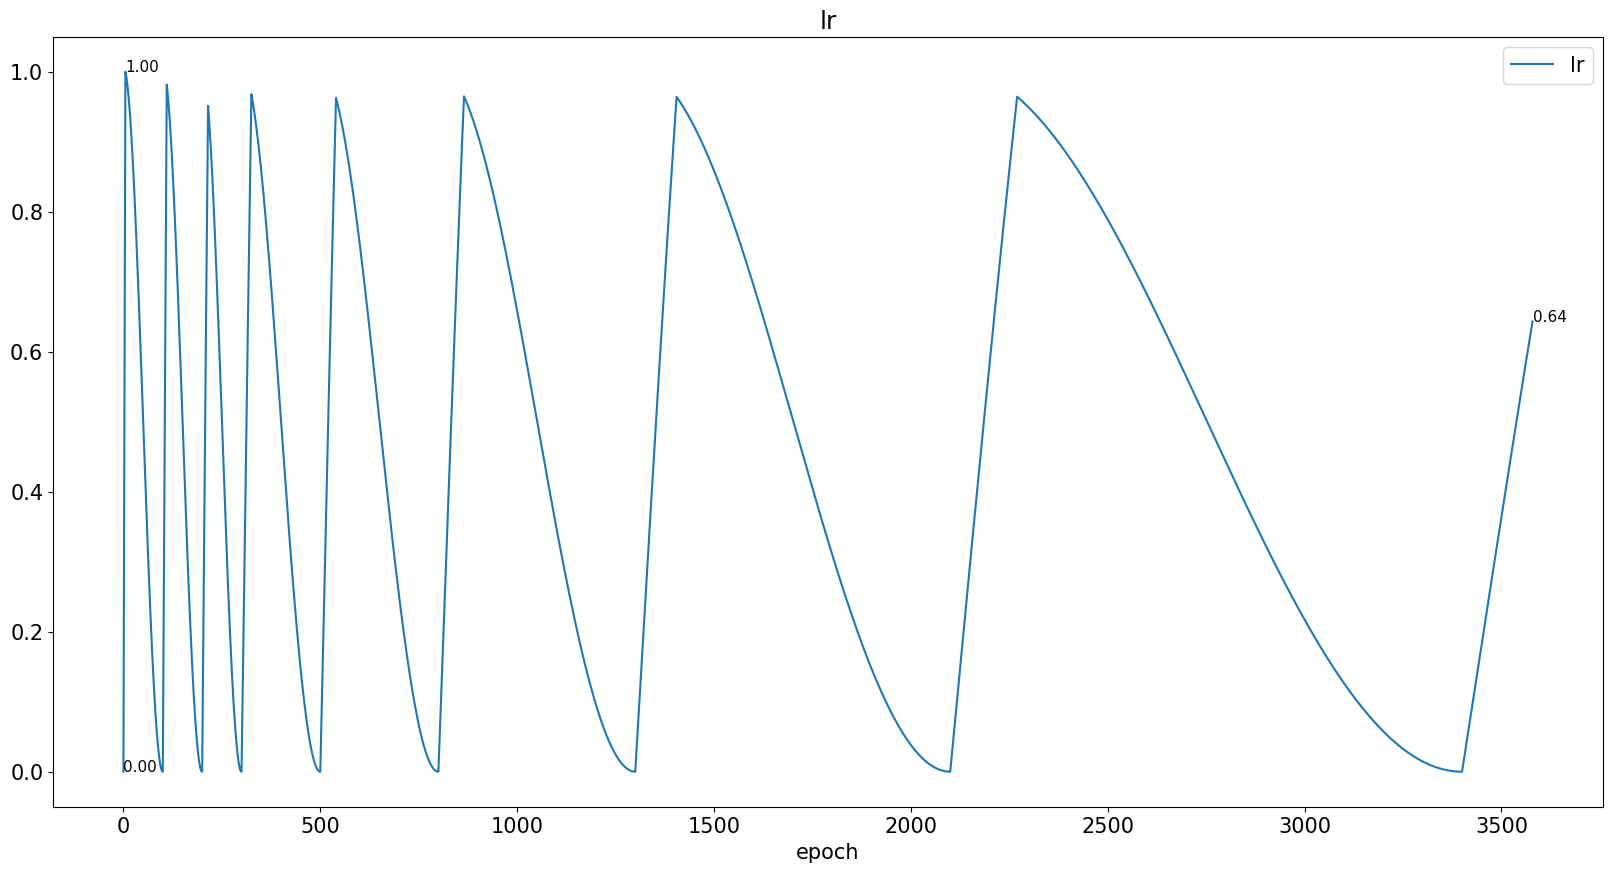

In [365]:
display(metrics, 'lr', 'lr', normalize=True)

In [366]:
for ax in axes:
    plt.close(ax.get_figure())

In [367]:
#metrics['val_avg_reward' != None]